### Loading Data

In [1]:
# loading training data
import numpy as np
import pandas as pd 
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

standard_scaler = StandardScaler()
mm = MinMaxScaler()
q = 1
if q == 1:
    l = 'training_data_f.csv' ;
if q == 2:
    l = 'Data.csv' ;  

    
num = 3 ;  

z = pd.read_csv(l).drop(['Unnamed: 0'],axis=1)
#z = z[z['yearID']<2015]
#z = z[z['yearID']>=2013]
train = z[z['yearID']!=2015].drop_duplicates(subset=['playerID','salary'])
test = z[z['yearID']==2015]

In [2]:
X = train.drop(['playerID','lgID','teamID','salary','POS'],axis=1)#,'salary_rank'
x_ = X.copy()
y = np.log(train['salary'])

### Feature Engineering : Feature importance

DecisionTree > feature importances : 
 [0.01703246 0.77927914 0.00288802 0.01938239 0.06044645 0.00311109
 0.00282912 0.00319312 0.0219884  0.00459118 0.0026104  0.00857041
 0.00621312 0.00570189 0.00321094 0.00270931 0.00275358 0.00285903
 0.00382431 0.00722822 0.00912245 0.00138478 0.00197826 0.00281828
 0.02129252 0.00298114]


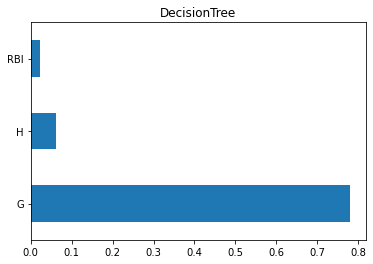

RandomForest > feature importances : 
 [0.01841822 0.6868026  0.06602854 0.03076889 0.03533831 0.00946407
 0.00281547 0.00570264 0.02928483 0.00348774 0.00316129 0.00643727
 0.0046598  0.00489764 0.00350228 0.00347077 0.00282222 0.00317448
 0.02122889 0.01504548 0.00807154 0.00258363 0.00280069 0.00331058
 0.02327258 0.00344954]


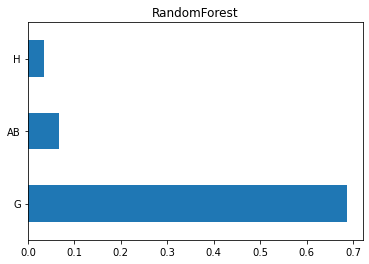

XGBRegressor > feature importances : 
 [0.00524179 0.2085203  0.00460111 0.003987   0.14947248 0.00442876
 0.00325195 0.01395857 0.3077236  0.00434225 0.0057721  0.00459181
 0.00301792 0.01313054 0.00481727 0.0056793  0.00517076 0.00452609
 0.10727558 0.00966583 0.01150241 0.00220016 0.00356899 0.00709766
 0.10061398 0.00584174]


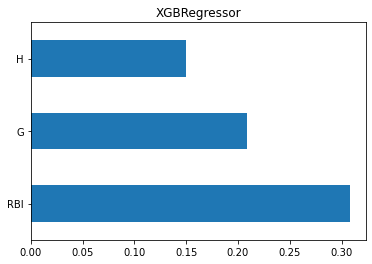

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

fi = np.array([])
model = [DecisionTreeRegressor(), 
         RandomForestRegressor(n_estimators=300),
         XGBRegressor(n_estimators=300)]  

model = [model[i].fit(X,y) for i in range(len(model))]

num_chr = [12, 12, 12]
# Use the inbuilt feature_importances_ of tree-based classifiers
# to plot graphs of feature importances for data visualization
for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ' > feature importances : \n', 
          model[i].feature_importances_) 
    feat_importances = pd.Series(model[i].feature_importances_, 
                                 index=X.columns)
    nn = feat_importances.nlargest(num)
    fi = np.union1d(fi,np.array(nn.index))
    nn.plot.barh()#.get_figure().savefig('importance{}'.format(i))
    # plt.xlim(0, 0.7)
    plt.title(str(model[i])[:num_chr[i]])
    plt.savefig('{}'.format(i+3))
    plt.show()

### Select Summary

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X= StandardScaler().fit_transform(train[x_.columns])
vif= pd.DataFrame()
vif['features'] = train[x_.columns].columns
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif

,features,VIF Factor
0,yearID,1.251600
1,G,81.609816
2,AB,384.110337
3,R,129.642032
4,H,336.389063
5,2B,36.105643
6,3B,4.685340
7,HR,37.709226
8,RBI,100.608811
9,SB,8.668900


In [5]:
fi

array(['AB', 'G', 'H', 'RBI'], dtype=object)

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X= StandardScaler().fit_transform(train[fi])
vif1= pd.DataFrame()
vif1['features'] = train[fi].columns
vif1["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif1

,features,VIF Factor
0,AB,174.394741
1,G,40.472663
2,H,97.084973
3,RBI,10.152418


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X= StandardScaler().fit_transform(train[['H', 'yearID', '3B', 'CS', 'IBB', 'HBP', 'SH', 'PO', 'E', 'DP', 'seniority', 'age']])
vif2= pd.DataFrame()
vif2['features'] = train[['H', 'yearID', '3B', 'CS', 'IBB', 'HBP', 'SH', 'PO', 'E', 'DP', 'seniority', 'age']].columns
vif2["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif2

,features,VIF Factor
0,H,8.891849
1,yearID,1.172401
2,3B,3.217323
3,CS,3.644521
4,IBB,2.768572
5,HBP,1.955296
6,SH,1.713377
7,PO,2.506303
8,E,2.726089
9,DP,2.329821


In [8]:
fi = ['H', 'yearID', '3B', 'CS', 'IBB', 'HBP', 'SH', 'PO', 'E', 'DP', 'seniority', 'age'
]#['H','yearID','3B','IBB','HBP','SH','age','PO','E','DP','CS','seniority']#

### Input Features

In [15]:
# feature variable X standardization
#X = standard_scaler.fit_transform(X_)#np.array
# split to Xtrain Xtest & Ytrain Ytest

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = (train[fi]),(test[fi]),np.log(train['salary']),np.log(test['salary'])


#Xtrain_l, X_l =(train[fi]),(test[fi])#['seniority','RBI']
#train_test_split(X, (y), random_state = 0)[['seniority', '3B', 'SB', 'HBP', 'SH', 'age', 'A','RBI']]
#standard_scaler.fit_transform

In [16]:
a = Xtrain; b = ytrain; c = Xtest; d = ytest

#al = Xtrain_l,cl = X_l

### Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

model = [LinearRegression(),
         DecisionTreeRegressor(random_state=1), 
         RandomForestRegressor(n_estimators=300, random_state=1),
         XGBRegressor(n_estimators=300,seed=1)]

model = [model[0].fit(a,b),model[1].fit(a,b),model[2].fit(a,b),model[3].fit(a,b)]
pred  = [model[0].predict(c), model[1].predict(c), model[2].predict(c), model[3].predict(c)]

In [18]:
from sklearn.metrics import r2_score
acc = [r2_score((d), (pred[i])) for i in range(len(model))]

num_chr = [6, 8, 12, 12, 8, 8, 8]
for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \t', acc[i])

Linear: 	 0.6572101361187596
Decision: 	 0.7458971783871602
RandomForest: 	 0.7881518484869883
XGBRegressor: 	 0.7964311693382682


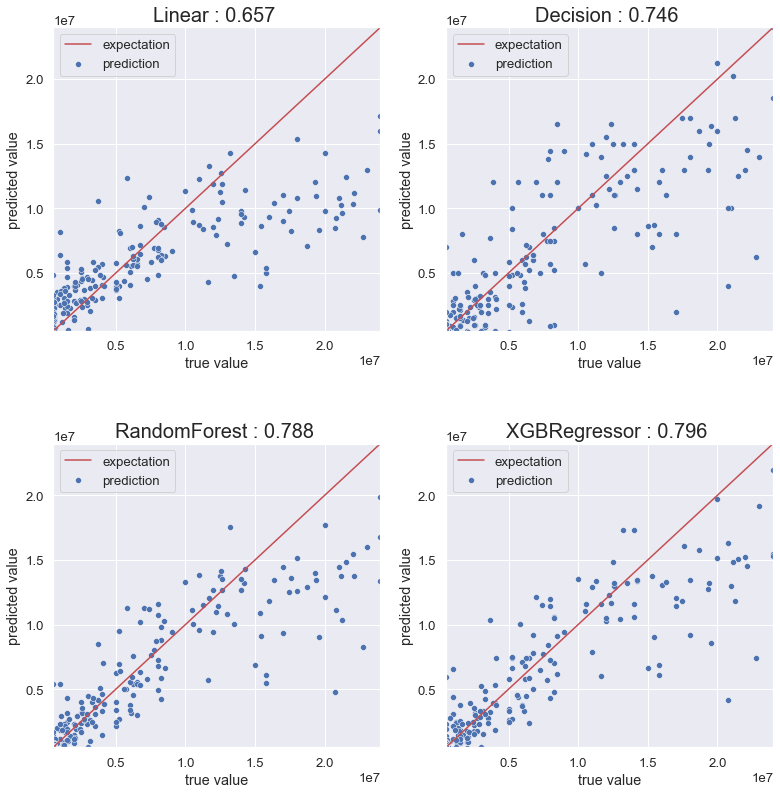

In [19]:
n_clf = len(model)
clfs = [str(model[i])[:num_chr[i]] 
                    for i in range(n_clf)]

mat = [((d), (pred[i])) for i in range(n_clf)]

# Plot the confusion matrix as a color-encoded matrix...
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, 
                    hspace=0.37, wspace=0.2)

# plot the confusion matrices
for i in range(n_clf):
    sns.set(font_scale=1.2)
    fig.add_subplot(2, n_clf//2, i + 1)
    sns.scatterplot(x=mat[i][0],y=mat[i][1], ci=None,label='prediction')# , cbar=True,square=True, annot=True
    plt.title('{} : {:.3f} '.format(str(model[i])[:num_chr[i]] , acc[i]),fontsize=20)
    plt.plot((min(d)-0.1, max(d)+0.1),(min(d)-0.1, max(d)+0.1),c='r',label='expectation')
    plt.xlim(min(d)-0.1, max(d)+0.1)
    plt.ylim(min(d)-0.1, max(d)+0.1)
    plt.xlabel('true value')
    plt.legend()
    plt.ylabel('predicted value');
plt.savefig('kk')

<Figure size 720x720 with 0 Axes>

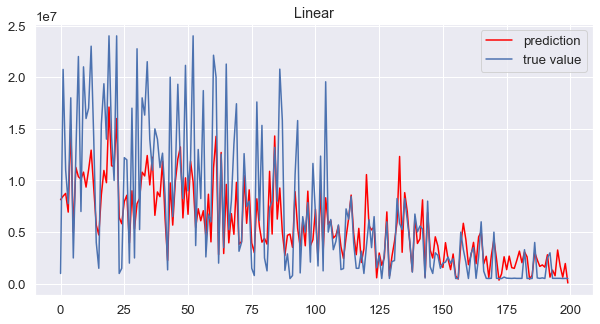

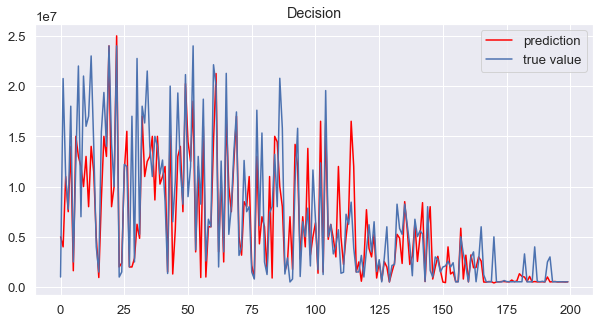

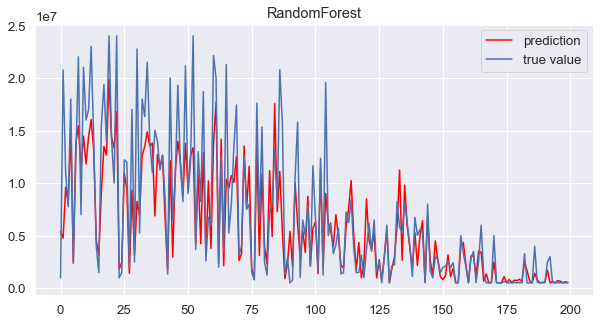

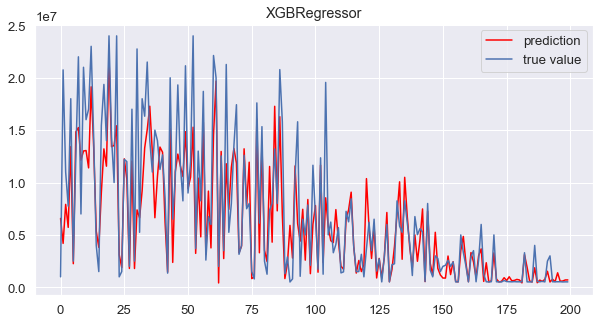

In [20]:
plt.figure(figsize=[10,10])
for j in range(4):
    plt.figure(figsize=[10,5])
    plt.title(clfs[j])
    plt.plot([i for i in range(200)],model[j].predict(c)[0:200],c='red',label='prediction')
    plt.plot([i for i in range(200)],d[0:200],label='true value')
    plt.legend(loc='upper right')